# Linear Regression Problem

## Preprocessing danych:
1.   [Opis merytoryki zbioru danych](#0)
2.   [Statystyki opisowe zmiennych](#1)
3.   [Wykresy rozkładu zmiennych oraz korelacji zmiennych](#2)
4.   [Wykres rozkładu zmiennej zależnej](#3)
5.   [Predykcje i ocenę dopasowania na zbiorze testowym - wykres + miary MAE, RMSE](#4)
6.   [Interpretacja oszacowań modelu oraz własności statystycznych modelu](#5)

### Import bibliotek

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

### Podczytanie danych

In [4]:
df = pd.read_csv("insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df['sex'] = df['sex'].replace({"female": 1, 'male':0})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
print("Zbiór danych zawiera: ", df.shape[0], " obserwacji i ", df.shape[1], " zmiennych")

Zbiór danych zawiera:  1338  obserwacji i  7  zmiennych


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [10]:
print("Występują tu typ danych object, int, float")

Występują tu typ danych object, int, float


In [10]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


##### 2. Podstawowe statystyki opisowe

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### 3. Wykres rozkładu i korelacji zmiennych

#### Wykres rozkładu zmiennych

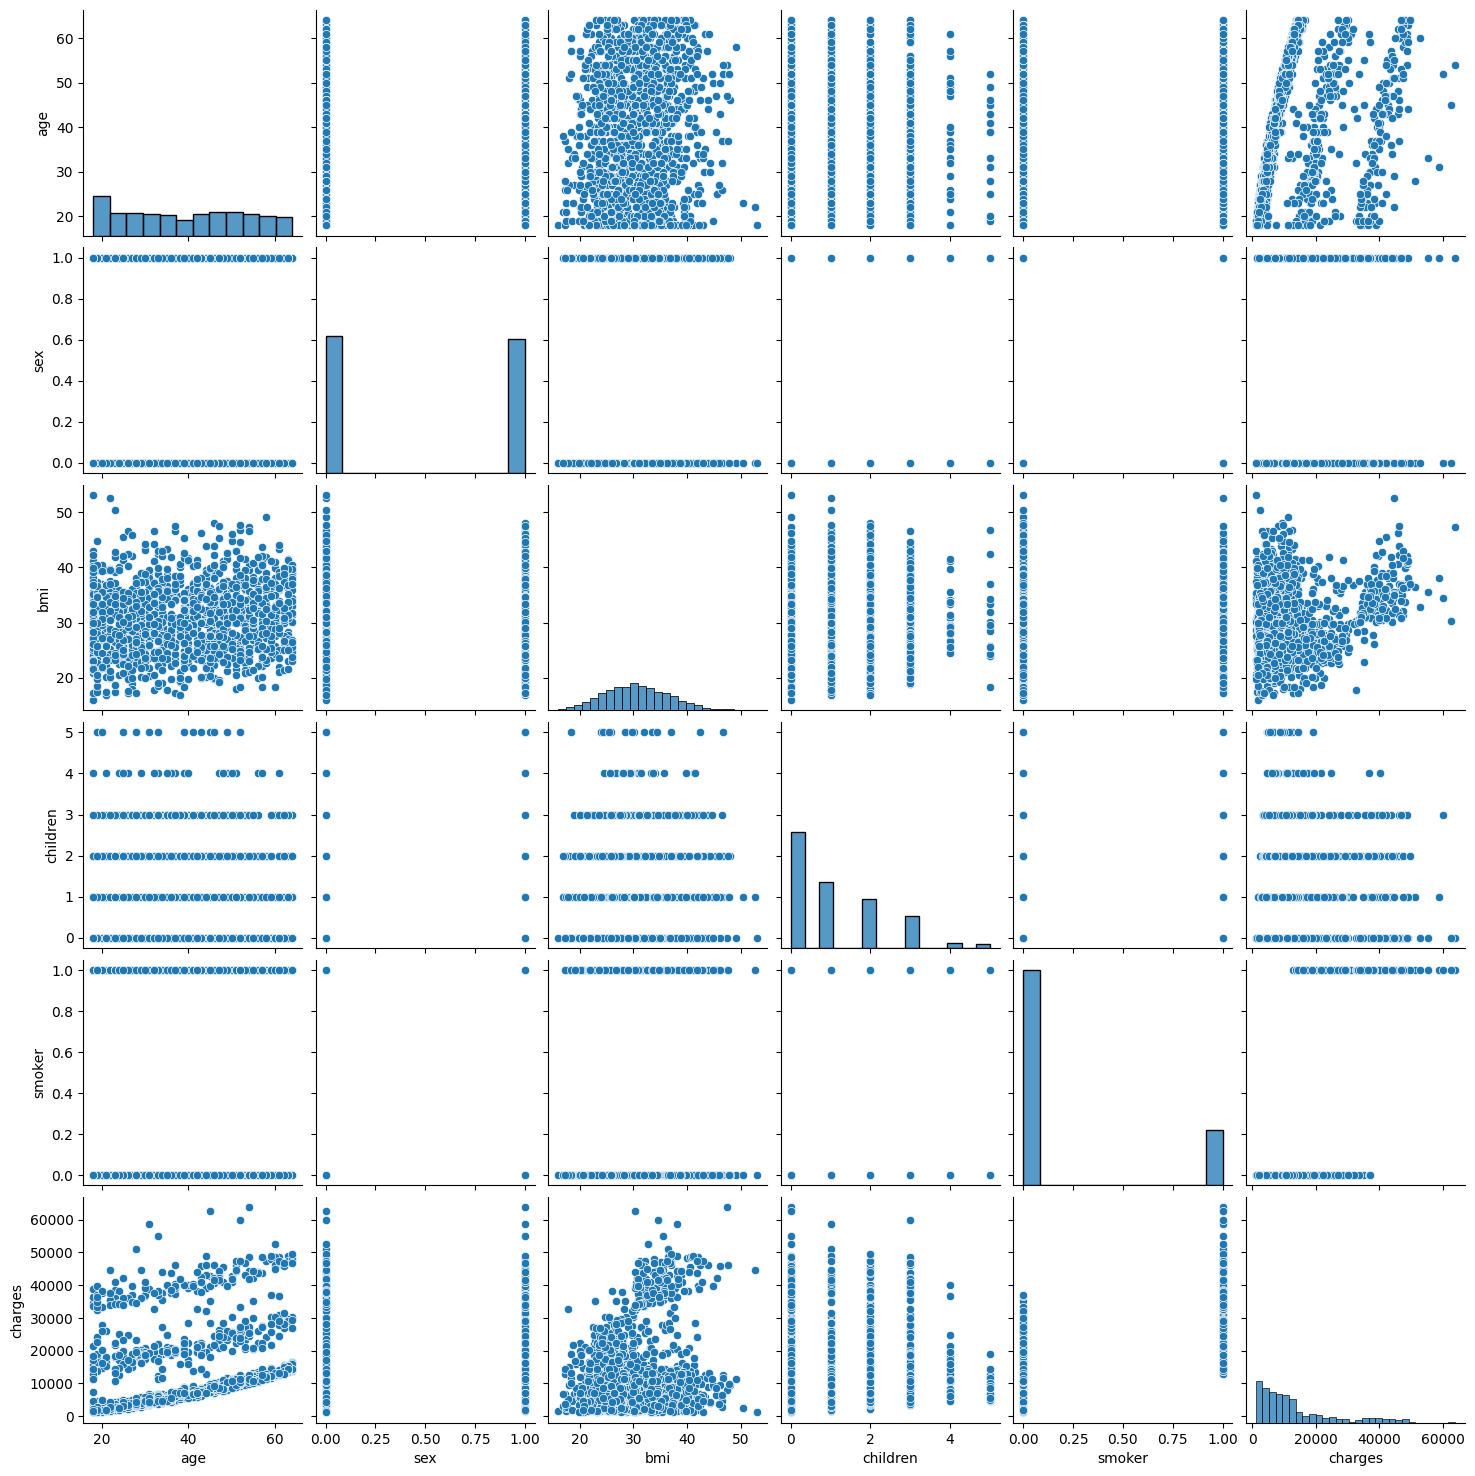

In [14]:
sns.pairplot(df)

#### Korelacja zmiennych

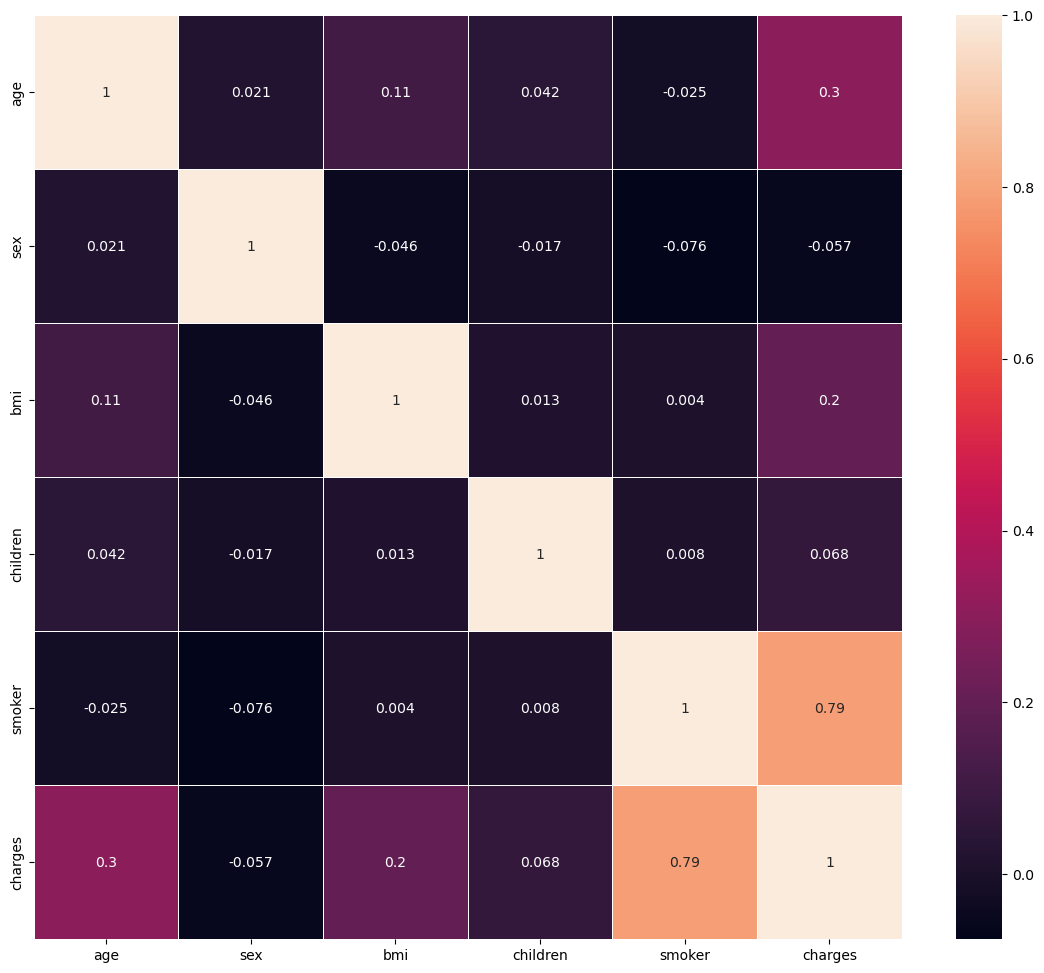

In [12]:
plt.figure(figsize=(14, 12)) 
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(round(numeric_df.corr(), 3), linewidths=0.5, annot=True)
plt.show()

In [13]:
print(numeric_df.corr().mean())

age         0.241098
sex         0.137307
bmi         0.212959
children    0.185623
smoker      0.282912
charges     0.382551
dtype: float64


In [14]:
numeric_df.corr().mean() <= 0.20

age         False
sex          True
bmi         False
children     True
smoker      False
charges     False
dtype: bool

Większość korelacji pomiędzy zmiennymi jest średnio dopasowana do modelu, 4 zmienne na 6 mają wiartość przekraczającą 0,20 sredniej korelacji pozostałe 2 są poniżej tej wartości

### 4. Wykres rozkładu zmiennej zależnej


Rozkład zmiennej **track_popularity**

C:\Users\urszu\AppData\Local\Temp\ipykernel_21548\1319113370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<Axes: xlabel='charges', ylabel='Density'>

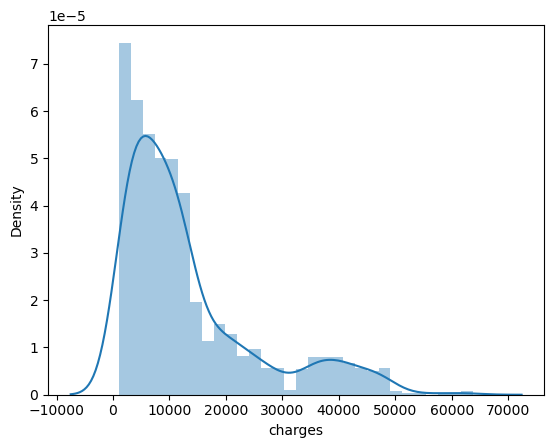

In [15]:
sns.distplot(df['charges'])

Rozkład zmiennej jest niesymetryczny (lewoskośny).

### 5. Predykcja

In [16]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
y = df['charges']
X = df[numeric_columns].drop('charges', axis=1)  

### 6. Podział na dane treningowe i testowe

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=46)

In [20]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
print(regression.intercept_)

-12950.196167903072


In [22]:
coeff_df = pd.DataFrame(regression.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,254.586327
sex,191.907131
bmi,346.904156
children,674.289004
smoker,24158.236581


Przy założeniu, że pozostałe cechy są stałe, wzrost o jedną jednostkę zmiennej:
* **age** jest związany ze **wzrostem o 254.58** jednostki zmiennej objąśnianej.
* **sex** jest związany ze **spadkiem o 191.90** jednostki zmiennej objąśnianej.
* **bmi** jest związany ze **spadkiem o 346.90** jednostki zmiennej objąśnianej.
* **children** jest związany ze **wzrostem o 674.289** jednostki zmiennej objąśnianej.
* **smoker** jest związany ze **wzrostem o 24158.23** jednostki zmiennej objąśnianej.


In [23]:
predictions = regression.predict(X_test)

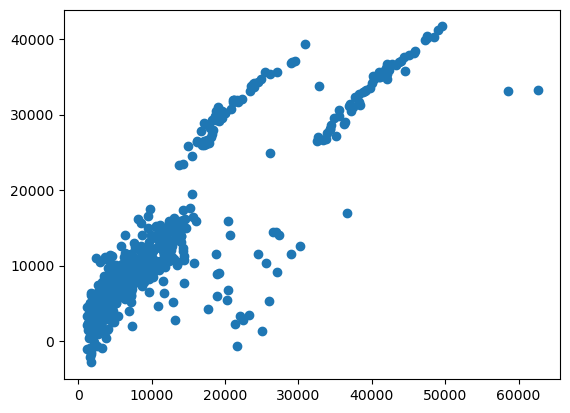

In [24]:
plt.scatter(y_test, predictions)

C:\Users\urszu\AppData\Local\Temp\ipykernel_21548\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


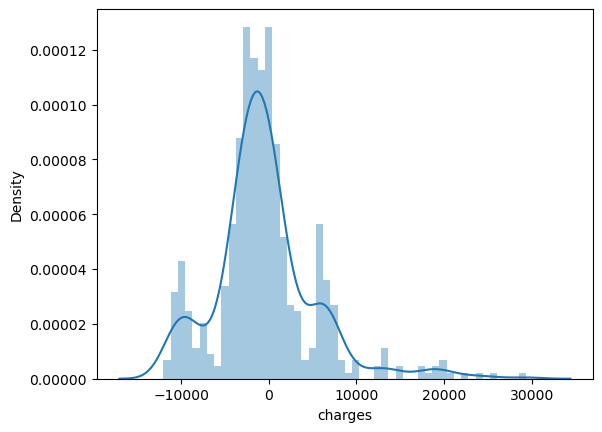

In [25]:
sns.distplot((y_test-predictions),bins=50);

Rozkład lewostronnie śkony. Im wieksza Density tym mniejsze Charges

In [26]:
from sklearn.metrics import mean_squared_error,r2_score

mean_squared_error(y_test,predictions)
r2_score(y_test, predictions)

0.7493293875282689

Dopasowanie danych do modelu wynosi 74%

In [28]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4074.954105277201
MSE: 34477378.62627459
RMSE: 5871.7440872601555


* **Mean Absolute Error (MAE)**: oznacza to, że przewidywania modelu regresji różnią się średnio o **4074.95** jednostek od rzeczywistych wartości.
* **Mean Squared Error (MSE)**: średni Błąd Kwadratowy wynosi **34477378.62**. MSE to średnia z kwadratów różnic między przewidywaniami a rzeczywistymi wartościami.
* **Root Mean Squared Error (RMSE)**: wartość ta wskazuje, że przewidywania modelu różnią się średnio o **5871.74** jednostek od rzeczywistych wartości.